### 正規分布からの標本
正規母集団とは、母集団分布が正規分布であるような母集団である。
正規母集団から標本がとられるという仮定は、統計学の理論の中心である。このとき、正規母集団からの標本$X_1,X_2,\cdots,X_n$に基づく統計量の標本分布を計算することが必要となり、この計算を行うのが正規標本論である。
### 正規分布の性質
確率変数$X$が正規分布に従うとき、その密度関数は、
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$
であり、その平均・分散は、
$$
E(X)=\mu,\hspace{5mm}V(X)=\sigma^2
$$
である。
正規分布は平均$\mu$と分散$\sigma^2$の二つの母数で決まる。
正規確率変数の線形変換は正規確率変数である。$X$が正規分布$N(\mu,\sigma^2)$に従う場合、$aX+b$は$N(a\mu+b,a^2\sigma^2)$に従う。
独立な二つ以上の正規確率変数の和および差は正規確率変数である。すなわち、$X,Y$がそれぞれ正規分布$N(\mu_1,\sigma_1^2),N(\mu_2,\sigma_2^2)$に従う場合、$X+Y$は正規分布$N(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2)$に従い、$X-Y$は正規分布$N(\mu_1-\mu_2,\sigma_1^2+\sigma_2^2)$に従い、一般的に、$aX+bY$は正規分布$N(a\mu_1+b\mu_2,a^2\sigma_1^2+b^2\sigma_2^2)$に従う。
$\mu=0,\sigma^2=1$の正規分布を特に標準正規分布と呼び、$N(0,1)$で表す。
標準正規分布では確率密度関数を$\phi(x)$で、累積分布関数を$\Phi(x)$で表す。
$$
\phi(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2},\hspace{5mm}\Phi(z)=\int_{-\inf}^{z}\phi(x)dx
$$
標準正規分布は0に関して対称であるから、$\Phi(-z)=1-\Phi(z)$で対応できる。
任意の$z_1<z_2$について、$Z$が$z_1$と$z_2$に間に入る確率$P(z_1< Z\leq z_2)=\Phi(z_2)-\Phi(z_1)$を求めることができる。

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

d = pd.read_csv('C:/Users/tanak/OneDrive/ドキュメント/pokemon_for_stats.csv').iloc[:,1:]
gen = ["第1世代"]*151+["第2世代"]*100+["第3世代"]*135+["第4世代"]*107+["第5世代"]*156+["第6世代"]*72+["第7世代"]*88+["第8世代"]*89
d['世代'] = gen

num_cols = ['重さ','高さ','HP','攻撃','防御','特攻','特防','素早さ','合計']
d.head()

,No.,ポケモン,タイプ1,タイプ2,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計,世代
0,1,フシギダネ,くさ,どく,6.9,0.7,45,49,49,65,65,45,318,第1世代
1,2,フシギソウ,くさ,どく,13.0,1.0,60,62,63,80,80,60,405,第1世代
2,3,フシギバナ,くさ,どく,100.0,2.0,80,82,83,100,100,80,525,第1世代
3,4,ヒトカゲ,ほのお,NaN,8.5,0.6,39,52,43,60,50,65,309,第1世代
4,5,リザード,ほのお,NaN,19.0,1.1,58,64,58,80,65,80,405,第1世代


Text(0.5, 0, '高さ(log)')

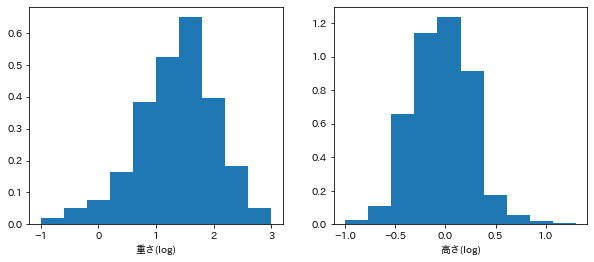

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

d['log重さ'] = np.log10(d['重さ'])
d['log高さ'] = np.log10(d['高さ'])

ax[0].hist(d['log重さ'], density=True);
ax[0].set_xlabel('重さ(log)')

ax[1].hist(d['log高さ'], density=True);
ax[1].set_xlabel('高さ(log)')

mu1:  1.35449018102742
sigma1:  0.6900325398726143
mu2:  -0.047102235494633445
sigma2:  0.31680339270844654


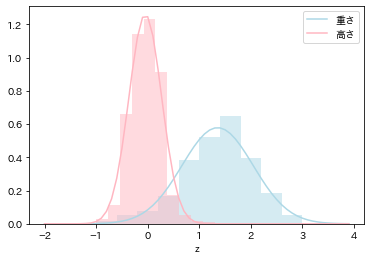

In [9]:
def normal_dist(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

x = np.arange(-2,4,0.1)

# 統計量
mu1 = np.mean(d['log重さ'])
sigma1 = np.std(d['log重さ'])
mu2 = np.mean(d['log高さ'])
sigma2 = np.std(d['log高さ'])

print('mu1: ', mu1)
print('sigma1: ', sigma1)
print('mu2: ', mu2)
print('sigma2: ', sigma2)

# 分布
d1 = normal_dist(x, mu1, sigma1)
d2 = normal_dist(x, mu2, sigma2)

# プロット
plt.plot(x, d1, color='lightblue', label='重さ')
plt.plot(x, d2, color='lightpink', label='高さ')
plt.hist(d['log重さ'], density=True, color='lightblue', alpha=.5);
plt.hist(d['log高さ'], density=True, color='lightpink', alpha=.5);
plt.xlabel('z');
plt.legend();

mu1+2:  1.3073879455327864
sigma1+2:  0.9644595486606273


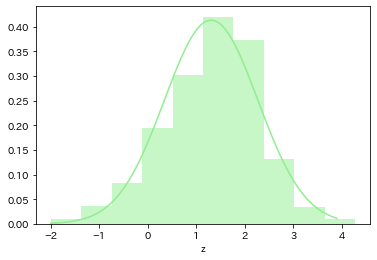

In [10]:
# 和
mu12 = np.mean(d['log重さ']+d['log高さ'])
sigma12 = np.std(d['log重さ']+d['log高さ'])

print('mu1+2: ', mu12)
print('sigma1+2: ', sigma12)

# 和の分布
d12 = normal_dist(x, mu12, sigma12)

# プロット
plt.plot(x, d12, color='lightgreen')
plt.hist(d['log重さ']+d['log高さ'], density=True, color='lightgreen', alpha=.5);
plt.xlabel('z');

mu1-2:  1.4015924165220535
sigma1-2:  0.4720554738869209
sigma1×sigma2:  0.4888129551228517


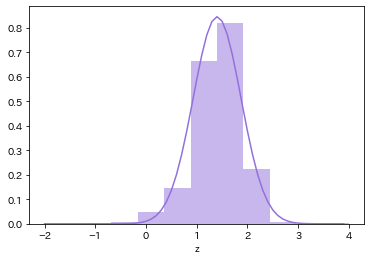

In [11]:
# 差
mu12 = np.mean(d['log重さ']-d['log高さ'])
sigma12 = np.std(d['log重さ']-d['log高さ'])

print('mu1-2: ', mu12)
print('sigma1-2: ', sigma12)
print('sigma1×sigma2: ', np.std(d['log重さ']*d['log高さ']))

# 差の分布
d12 = normal_dist(x, mu12, sigma12)

# プロット
plt.plot(x, d12, color='mediumpurple')
plt.hist(d['log重さ']-d['log高さ'], density=True, color='mediumpurple', alpha=.5);
plt.xlabel('z');

### 分散が既知のときの標本平均の標本分布
標本平均$\bar{X}$に分布は正規分布であり、平均は母集団分布と同一で$\mu$、分散は$\sigma^2/n$である。
$X_1,\cdots,X_n$はそれぞれ独立であるから、
$$
V(X_1+X_2+\cdots+X_n)=V(X_1)+V(X_2)+\cdots+V(X_n)=n\sigma^2
$$

$$
\bar{X}=\frac{X_1+X_2+\cdots+X_n}{n}
$$
であるから、

$$
V(\bar{X})=V((X_1+X_2+\cdots+X_n)/n)=n\sigma^2/n^2=\sigma^2/n
$$

すなわち、$\bar{X}$の分布は$N(\mu,\sigma^2/n)$であり、それを標準化した

$$
Z=\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}
$$

は標準正規分布$N(0,1)$に従う。
この$N(0,1)$において、その点より上側の確率が$100\alpha %$となる点をパーセント点と呼び、$Z_\alpha$と記す。
$\bar{X}$の標準偏差が$\sigma/\sqrt{n}$であることは、次のことを意味する。
1. $n$が増加するに従い$\bar{X}$は$\mu$のより正確な推定値となる
2. 推定の誤差は$1/\sqrt{n}$のオーダーでしか減少しない。

標本の平均$\bar{X}$をとることの意味は、測定の正確さを単独の場合よりも増すことにある。これを反復数の原理と呼ぶことがある。

mu(n=4):  1.3493900092019346
sigma(n=4):  0.34501626993630713
mu(n=8):  1.3677749532600618
sigma(n=8):  0.24396334409165113
mu(n=40):  1.3572324662570399
sigma(n=40):  0.10910372428142072


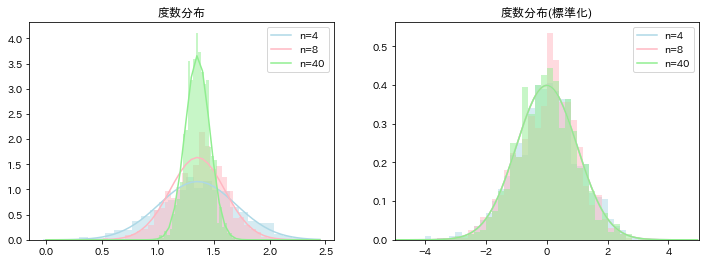

In [14]:
colors = ['lightblue', 'lightpink', 'lightgreen']

# 分散が既知
sigma = np.std(d['log重さ'])

fig, ax = plt.subplots(1,2,figsize=(12,4))
for i, n in enumerate([4, 8, 40]):
    # 各サンプルで平均の計算
    sample_mean = np.array([d['log重さ'].sample(n).mean() for _  in range(1000)])
    
    # 平均と標準偏差
    mu = np.mean(sample_mean)
    sigma1 = sigma/np.sqrt(n)
    
    print('mu(n='+str(n)+'): ', mu)
    print('sigma(n='+str(n)+'): ', sigma1)

    # 標準化
    sample_std = (sample_mean-mu)/np.sqrt(sigma1**2)
    
    # 分布
    x1 = np.arange(0,2.5,0.05)
    normal_dist1 = normal_dist(x1, mu1, sigma1)
    x2 = np.arange(-5,5,0.05)
    normal_dist2 = normal_dist(x2, 0, 1)

    # プロット
    ax[0].hist(sample_mean, density=True, color=colors[i], alpha=.5, bins=30);
    ax[0].plot(x1, normal_dist1, color=colors[i], label='n='+str(n))
    ax[1].hist(sample_std, density=True, color=colors[i], alpha=.5, bins=np.arange(-10,10,0.2));
    ax[1].plot(x2, normal_dist2, color=colors[i], label='n='+str(n))
    ax[1].set_xlim(-5,5)

ax[0].set_title('度数分布');
ax[1].set_title('度数分布(標準化)');
ax[0].legend();
ax[1].legend();

### 標本分散の標本分布
標本分散(不偏分散)は母分散$\sigma^2$に対応するもので、
$$
s^2=\frac{1}{n-1}\{(X_1-\bar{X})^2+(X_2-\bar{X})^2+\cdots+(X_n-\bar{X})^2 \}
$$
によって計算される。
$$
E[s^2]=\sigma^2
$$
であることはわかっているが、正規母集団を仮定すれば、標本分散$s^2$の標本分布を求めることができる。
各測定誤差の分散の大きさが$\sigma^2$であるという事実
$$
V(e_i)=\sigma^2,\hspace{5mm}i=1,2,\cdots,n
$$

を書き直すと、E(e_i)=0であるから、
$$
E(e_i^2)=V(e_i)+(E(e_i))^2=\sigma^2,\hspace{5mm}i=1,2,\cdots,n
$$

となる。
測定誤差の二乗$e_i^2$が表れているが、$n$回の測定を通してなら、
$$
e_1^2+e_2^2+\cdots+e_n^2
$$
が標本分散$s^2$の標本分布を求めるのに基礎的な量になることが分かる。
一般に$e_1,\cdots,e_n$は独立で、$N(0,1)$に従っているが、$\sigma=1$として$N(0,1)$を仮定すれば十分である。
ここで、$Z_1,\cdots,Z_k$を独立な、標準正規分布$N(0,1)$に従う確率変数とする。
$$
\chi^2=Z_1^2+\cdots+Z_k^2
$$
とすると、確率変数$\chi^2$が従う確率分布を自由度$k$の$\chi^2$分布と呼ぶ。
$\chi^2$分布は、正規標本論で標本分散を扱うときには必ず関係してくる確率分布である。
自由度$k$の$\chi^2$分布の上側確率が$\alpha$となる値を$\chi_{\alpha}^2(k)$と書き、上側確率100αのパーセント点と呼ぶ。
標本分散を
$$
s^2=\frac{1}{n-1}\{(X_1-\bar{X})^2+(X_2-\bar{X})^2+\cdots+(X_n-\bar{X})^2 \}
$$

とするとき、統計量

$$
\chi^2=(n-1)s^2/\sigma^2
$$

は自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従う。

Var mean(n=8):  0.4659970520061034
Var mean(n=40):  0.4681515573937705
Var mean(n=100):  0.4747606105062194


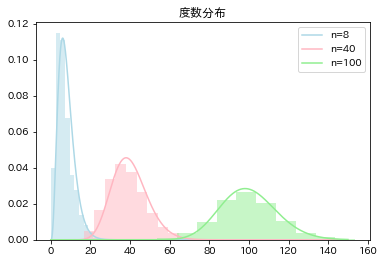

In [16]:
from scipy.stats import chi2

# 分散が既知
sigma = np.std(d['log重さ'])

for i, n in enumerate([8, 40, 100]):
    # 標本分散
    sample = np.array([d['log重さ'].sample(n).var(ddof=1) for _  in range(1000)])
    print('Var mean(n='+str(n)+'): ', np.mean(sample))
    
    # 統計量
    chi_sq_calc = (n-1)*sample/(sigma**2)

    # 分布
    x = np.arange(0,150,0.05)
    chi_sq = chi2.pdf(x, df=n)
    
    # プロット
    plt.plot(x, chi_sq, color=colors[i], label='n='+str(n))
    plt.hist(chi_sq_calc, density=True, color=colors[i], alpha=.5);

plt.title('度数分布');
plt.legend();

### 分散が未知のときの標本平均の標本分布
母分散や母標準偏差が分かっているという状況は想定しにくい。
したがって、$\sigma^2$の代わりに標本分散$s^2$を使う方法が考えられる。その場合の$\bar{X}$の標本分布を考える。
標本平均$\bar{X}$の標本分布は正規分布$N(\mu,\sigma^2/n)$であるから、その標準化

$$
Z=\frac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}
$$
は標準正規分布$N(0,1)$に従う。
しかし、$\sigma^2$がわかっていないので、標本(不偏)分散$s^2$で代用したスチューデントのt統計量

$$
t=\frac{\bar{X}-\mu}{\sqrt{s^2/n}}
$$

を定義する。これは、すでに標準正規分布に従わない。
この確率分布は

$$
t=\frac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}/\sqrt{s^2/\sigma^2}
$$

であり、さらに分母を変形すると

$$
t=\frac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}/\sqrt{\frac{(n-1)s^2}{\sigma^2}\frac{1}{(n-1)}}
$$

となる。
分子は標準正規分布$N(0,1)$に、分母は自由度$n-1$の$\chi^2$分布に従う。
$\bar{X}$と$s^2$は互いに独立であるので、$N(0,1)$と$\chi^2(n-1)$の組み合わせから、$t$の密度関数が求まる。
これを新たにt分布と呼ぶ。
ここで、二つの確率変数$Y$と$Z$が次の条件を満たすものとする。
1. $Z$は標準正規分布$N(0,1)$に従う
2. $Y$は自由度$k$の$\chi^2$分布$\chi^2(k)$に従う
3. $Z$と$Y$は独立である

いま、確率変数$t$を

$$
t=\frac{Z}{\sqrt{Y/k}}
$$

と定義すると、$t$が従う確率分布を自由度$k$の$t$分布と呼び、$t(k)$と記す。

$$
t=\frac{\bar{X}-\mu}{\sqrt{s^2/n}}
$$

で定義されたt統計量は、自由度$n-1$のt分布$t(n-1)$に従う。
また、$\bar{X}$の標準偏差$s/\sqrt{n}$を、標準平均の標準誤差と呼ぶ。
kが大きい場合は、標準正規分布とほとんど変わらない。
上側確率$\alpha$に対して、自由度$k$のt分布$t(k)$の上側確率$100\alpha%$のパーセント点を$t_\alpha(k)$とかく。

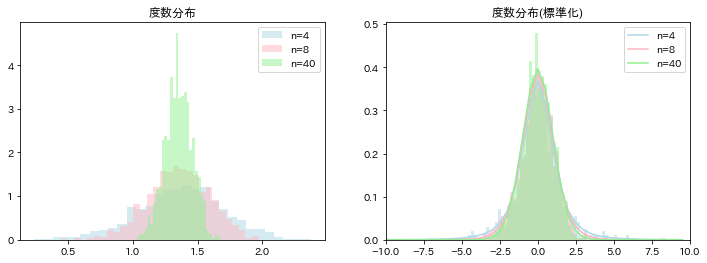

In [18]:
from scipy import stats

fig, ax = plt.subplots(1,2,figsize=(12,4))
for i, n in enumerate([4, 8, 40]):
    # 平均と標準偏差
    sample_mean = np.array([d['log重さ'].sample(n).mean() for _  in range(1000)])
    sample_std = np.array([d['log重さ'].sample(n).std(ddof=1) for _  in range(1000)])
    
    # 標本平均の平均
    mu = np.mean(sample_mean)

    # 統計量
    sample = (sample_mean-mu)/np.sqrt(sample_std**2/n)
    
    # t分布
    x = np.arange(-10,10,0.5)
    t_dist = stats.t.pdf(x, df=n-1)

    # プロット
    ax[0].hist(sample_mean, density=True, color=colors[i], alpha=.5, bins=30, label='n='+str(n));
    ax[1].plot(x, t_dist, color=colors[i], label='n='+str(n))
    ax[1].hist(sample, density=True, color=colors[i], alpha=.5, bins=np.arange(-10,10,0.2));
    ax[1].set_xlim(-10,10)

ax[0].set_title('度数分布');
ax[1].set_title('度数分布(標準化)');
ax[0].legend();
ax[1].legend();

### 2標本問題
明らかに異なる2種の標本による2母集団の比較を扱う問題を2標本問題という。
2標本問題では、二つの母集団から別々に標本を抽出したと考える。
ここでは、大きさ$m$の第一の標本$X_1,\cdots,X_m$を母集団分布$N(\mu_1,\sigma_1^2)$の正規母集団から、大きさ$n$の第二の標本$Y_2,\cdots,Y_n$を母集団分布$N(\mu_2,\sigma_2^2)$の正規母集団から、それぞれ独立に抽出した場合の標本分布について考える。

#### 標本平均の差の標本分布
2標本問題では二つの母平均の差$\mu_1-\mu_2$を分析することが重要となる。
2種類の標本から個別に計算した標本平均
$$
\bar{X}=\frac{1}{m}(X_1+\cdots+X_m),\hspace{5mm} \bar{Y}=\frac{1}{n}(Y_1+\cdots+Y_n)
$$

の差$\bar{X}-\bar{Y}$の大小を見ればよい。

##### 母分散が既知のとき
二つの母集団の母分散$\sigma_1^2,\sigma_2^2$が既知である場合は、$\bar{X}$の分布は正規分布$N(\mu_1, \sigma_1^2/m)$であり、$\bar{Y}$の分布は正規分布$N(\mu_2, \sigma_2^2/n)$である。
$\bar{X}$と$\bar{Y}$は独立であるから、$\bar{X}-\bar{Y}$の分布は正規分布$N(\mu_1-\mu_2,(\sigma_1^2/m)+(\sigma_2^2/n))$となる。
標準化すると、
$$
Z=\frac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{(\sigma_1^2/m)+(\sigma_2^2/n)}}
$$
は標準正規分布$N(0,1)$に従う。

##### 母分散は未知であるが等しいとき
$\sigma^2=\sigma_1^2=\sigma_2^2$であると仮定できるときは、標本分散を母分散$\sigma^2$の代わりに使って$\bar{X}-\bar{Y}$の分散を求める。
$\bar{X}-\bar{Y}$の分布は、正規分布$N(\mu_1-\mu_2,(1/m+1/n)\sigma^2)$であるが、$\sigma^2$は未知であるから、母分散が共通の二つの標本を合併したものから次の合併した分散で推定する。
$$
\begin{align}
s^2&=\frac{\sum_{i=1}^m(X_i-\bar{X})^2+\sum_{j=1}^n(Y_j-\bar{Y})^2}{m+n-2}\\
&=\frac{(m-1)s_1^2+(n-1)s_2^2}{m+n-2}
\end{align}
$$

$s_1^2,s_2^2$は各々の標本の標本分散である。このように標本分散を定義すると、
1. $(m+n-2)s^2/\sigma^2$は自由度$m+n-2$の$\chi^2$分布$chi^2(m+n-2)$に従う
2. $s^2$と$\bar{X}-\bar{Y}$は独立である
という二つのことが知られている。
ここで、標準化して
$$
Z=\frac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{\biggl(\frac{1}{m}+\frac{1}{n} \biggr)\sigma^2}}
$$
とすると、$Z$の分布は標準正規分布$N(0,1)$である。
$Z$を$\sqrt{s^2/\sigma^2}$で割ることにより未知の$\sigma^2$は消えて$s^2$が入り、2標本t統計量
$$
\begin{align}
t&=\frac{Z}{\sqrt{s^2/\sigma^2}}\\
&=\frac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{s\sqrt{\frac{1}{m}+\frac{1}{n}}}
\end{align}
$$
が、自由度$m+n-2$のt分布$t(m+n-2)$に従うことが分かる。

##### 母分散が未知であり等しいとは限らないとき
この場合は、二つの母集団の分散$\sigma_1^2$と$\sigma_2^2$を推定して$\bar{X}-\bar{Y}$の分布を求める必要があるが、どのようにしても$\sigma_1^2$と$\sigma_2^2$によらない統計量をつくることはできない。
このため、正確な$\bar{X}-\bar{Y}$の正確な分布を求めることはできない。
この場合、近似的に分布を求めるウェルチの近似法が知られている。
$$
t=\frac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{m}+\frac{s_2^2}{n}}}
$$
は、近似的に自由度が
$$
\nu=\frac{\biggl(\frac{s_1^2}{m}+\frac{s_2^2}{m} \biggr)^2}{\frac{(s_1^2/m)^2}{m-1}+\frac{(s_2^2/n)^2}{n-1}}
$$
に最も近い整数$\nu^*$のt分布$t(\nu^*)$に従うことが知られている。

In [21]:
# いわ、でんき、ほのお
d[['log重さ', 'タイプ1']].groupby('タイプ1').describe()

log重さ                                                              \
       count      mean       std       min       25%       50%       75%   
タイプ1                                                                       
あく      36.0  1.427615  0.504012  0.322219  1.064260  1.462140  1.678816   
いわ      50.0  1.781052  0.540956  0.755875  1.398805  1.775944  2.215862   
かくとう    36.0  1.602330  0.429537  0.602060  1.318002  1.641651  1.922651   
くさ      86.0  1.069975  0.696157 -1.000000  0.614848  1.113943  1.558628   
こおり     28.0  1.712672  0.610143  0.579784  1.366302  1.745072  2.172153   
じめん     34.0  1.703872  0.621331 -0.096910  1.366784  1.753090  2.039400   
でんき     50.0  1.249908  0.678190 -0.522879  0.778151  1.356745  1.763860   
どく      35.0  1.377402  0.571611  0.000000  0.965983  1.361728  1.783513   
はがね     30.0  1.837073  0.793390  0.041393  1.485884  1.907140  2.376393   
ひこう      7.0  1.317368  0.610229  0.255273  1.053605  1.255273  1.837201   
ほのお     58.0  1.488890  0.543806  0.000000  1.138092  1.462140  1.904034   
みず     123.0  1.393294  0.573730 -0.522879  0.977724  1.431364  1.802653   
むし      75.0  1.156687  0.604458 -0.698970  0.791883  1.230449  1.521779   
エスパー    58.0  1.121233  0.796679 -1.000000  0.698970  1.215682  1.683944   
ゴースト    31.0  0.929656  1.038875 -1.000000  0.127636  1.096910  1.746729   
ドラゴン    31.0  1.711685  0.606051  0.301030  1.312811  1.748188  2.160276   
ノーマル   109.0  1.280588  0.598294 -0.096910  0.812913  1.380211  1.627366   
フェアリー   21.0  0.679980  0.913636 -1.000000 -0.045757  0.698970  1.371068   

                 
            max  
タイプ1             
あく     2.948413  
いわ     2.913814  
かくとう   2.404492  
くさ     2.491362  
こおり    2.903090  
じめん    2.977724  
でんき    2.278754  
どく     2.977724  
はがね    2.999957  
ひこう    1.929419  
ほのお    2.633468  
みず     2.599883  
むし     2.523226  
エスパー   2.999957  
ゴースト   2.875061  
ドラゴン   2.537819  
ノーマル   2.662758  
フェアリー  2.332438

In [23]:
# いわ分散 = ほのお分散 < でんき分散
d_iwa = d.query("タイプ1=='いわ'")['log重さ']
d_den = d.query("タイプ1=='でんき'")['log重さ']
d_hon = d.query("タイプ1=='ほのお'")['log重さ']

母分散が既知の場合

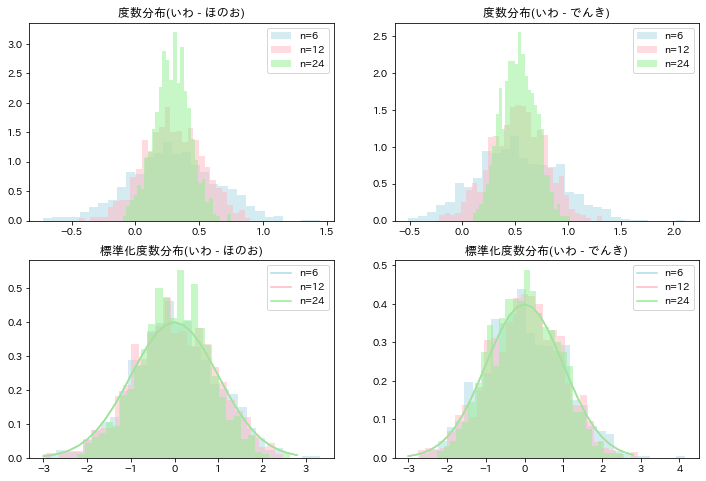

In [26]:
# サンプル数
M = [4,8,16]
N = [6,12,24]

# 分散が既知
sig1 = np.std(d_iwa)
sig2 = np.std(d_hon)
sig3 = np.std(d_den)

fig, ax = plt.subplots(2,2,figsize=(12,8))
for i, (m, n) in enumerate(zip(M, N)):
    # 各分布での平均
    X_bar = np.array([d_iwa.sample(n).mean() for _  in range(1000)])
    Y1_bar = np.array([d_hon.sample(m).mean()  for _  in range(1000)])
    Y2_bar = np.array([d_den.sample(m).mean()  for _  in range(1000)])
    
    # 平均値の差
    X_Y1 = X_bar - Y1_bar
    X_Y2 = X_bar - Y2_bar

    # 平均の期待値は母平均の不偏推定量
    mu1 = np.mean(X_bar)
    mu2 = np.mean(Y1_bar)
    mu3 = np.mean(Y2_bar)
    
    # 統計量
    Z1 = (X_Y1 - (mu1 - mu2))/np.sqrt(sig1**2/m+sig2**2/n)
    Z2 = (X_Y2 - (mu1 - mu3))/np.sqrt(sig1**2/m+sig3**2/n)
    
    # 分布
    x = np.arange(-3,3,0.2)
    n_dist = normal_dist(x, 0, 1)

    # プロット
    ax[0][0].hist(X_Y1, density=True, color=colors[i], alpha=.5, bins=30, label='n='+str(n));
    ax[0][1].hist(X_Y2, density=True, color=colors[i], alpha=.5, bins=30, label='n='+str(n));
    
    ax[1][0].plot(x, n_dist, color=colors[i], label='n='+str(n))
    ax[1][0].hist(Z1, density=True, color=colors[i], alpha=.5, bins=30);
    ax[1][1].plot(x, n_dist, color=colors[i], label='n='+str(n))
    ax[1][1].hist(Z2, density=True, color=colors[i], alpha=.5, bins=30);

ax[0][0].set_title('度数分布(いわ - ほのお)');
ax[0][1].set_title('度数分布(いわ - でんき)');
ax[1][0].set_title('標準化度数分布(いわ - ほのお)');
ax[1][1].set_title('標準化度数分布(いわ - でんき)');
ax[0][0].legend();
ax[0][1].legend();
ax[1][0].legend();
ax[1][1].legend();

母分散が未知で、分散が等しい場合と等しいとは限らない場合

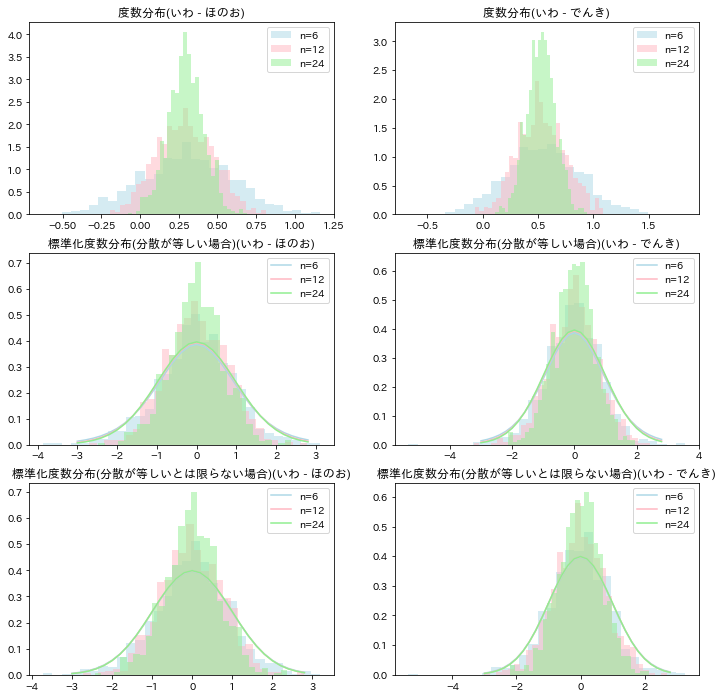

In [30]:
M = [4,8,16]
N = [6,12,24]

fig, ax = plt.subplots(3,2,figsize=(12,12))
for i, (m, n) in enumerate(zip(M, N)):
    sample1 = np.array([d_iwa.sample(n) for _  in range(1000)])
    sample2 = np.array([d_hon.sample(n) for _  in range(1000)])
    sample3 = np.array([d_den.sample(n) for _  in range(1000)])
    
    # 標本平均
    X_bar  = sample1.mean(axis=1)
    Y1_bar = sample2.mean(axis=1)
    Y2_bar = sample3.mean(axis=1)
    
    X_Y1 = X_bar - Y1_bar
    X_Y2 = X_bar - Y2_bar
    
    # 標本分散
    sx  = sample1.std(ddof=1, axis=1)
    sy1 = sample2.std(ddof=1, axis=1)
    sy2 = sample3.std(ddof=1, axis=1)
    
    # 合併した分散
    s1 = np.sqrt(((m-1)*(sx**2)+(n-1)*(sy1**2)) / (m+n-2))
    s2 = np.sqrt(((m-1)*(sx**2)+(n-1)*(sy2**2)) / (m+n-2))

    # 平均の期待値は母平均の不偏推定量
    mu1 = np.mean(X_bar)
    mu2 = np.mean(Y1_bar)
    mu3 = np.mean(Y2_bar)
    
    # 「母分散は未知であるが等しいとき」とした場合
    Z11 = (X_Y1 - (mu1 - mu2))/(s1*np.sqrt(1/m+1/n))
    Z12 = (X_Y2 - (mu1 - mu3))/(s2*np.sqrt(1/m+1/n))
    
    x = np.arange(-3,3,0.2)
    # t分布
    t_dist = stats.t.pdf(x, df=m+n-2)
    
    # 「母分散が未知であり等しいとは限らないとき」とした場合
    Z21 = (X_Y1 - (mu1 - mu2))/(np.sqrt(sx**2/m+sy1**2/n))
    Z22 = (X_Y2 - (mu1 - mu3))/(np.sqrt(sx**2/m+sy2**2/n))
    
    # 自由度の計算
    _sx = sx.mean()
    _sy1 = sy1.mean()
    _sy2 = sy2.mean()
    nu1 = int((_sx**2/m+_sy1**2/n)/((_sx**2/m)**2/(m-1)+(_sy1**2/n)**2/(n-1)))
    nu2 = int((_sx**2/m+_sy2**2/n)/((_sx**2/m)**2/(m-1)+(_sy2**2/n)**2/(n-1)))
    
    # t分布
    t_dist1 = stats.t.pdf(x, df=nu1)
    t_dist2 = stats.t.pdf(x, df=nu2)

    # 差の分布
    ax[0][0].hist(X_Y1, density=True, color=colors[i], alpha=.5, bins=30, label='n='+str(n));
    ax[0][1].hist(X_Y2, density=True, color=colors[i], alpha=.5, bins=30, label='n='+str(n));
    
    # 「母分散は未知であるが等しいとき」とした場合
    ax[1][0].plot(x, t_dist, color=colors[i], label='n='+str(n))
    ax[1][0].hist(Z11, density=True, color=colors[i], alpha=.5, bins=30);
    ax[1][1].plot(x, t_dist, color=colors[i], label='n='+str(n))
    ax[1][1].hist(Z12, density=True, color=colors[i], alpha=.5, bins=30);
    
    # 「母分散が未知であり等しいとは限らないとき」とした場合
    ax[2][0].plot(x, t_dist1, color=colors[i], label='n='+str(n))
    ax[2][0].hist(Z21, density=True, color=colors[i], alpha=.5, bins=30);
    ax[2][1].plot(x, t_dist2, color=colors[i], label='n='+str(n))
    ax[2][1].hist(Z22, density=True, color=colors[i], alpha=.5, bins=30);

ax[0][0].set_title('度数分布(いわ - ほのお)');
ax[0][1].set_title('度数分布(いわ - でんき)');
ax[1][0].set_title('標準化度数分布(分散が等しい場合)(いわ - ほのお)');
ax[1][1].set_title('標準化度数分布(分散が等しい場合)(いわ - でんき)');
ax[2][0].set_title('標準化度数分布(分散が等しいとは限らない場合)(いわ - ほのお)');
ax[2][1].set_title('標準化度数分布(分散が等しいとは限らない場合)(いわ - でんき)');
ax[0][0].legend();
ax[0][1].legend();
ax[1][0].legend();
ax[1][1].legend();
ax[2][0].legend();
ax[2][1].legend();

#### 標本分散の比の標本分布
二つの母集団分布の分散$\sigma_1^2$と$\sigma_2^2$が等しいかどうかについて、二つの標本分散$s_1^2$と$s_2^2$の相対的な比$s_1^2/s_2^2$について知ることが手掛かりとなる。
二つの分散は独立で、それぞれ$\chi^2$分布に従うから、$\chi^2$分布に従う確率変数の比の確率分布が必要となる。それがF分布である。
確率変数$U,V$が次の条件を満たすものとする。

1. $U$は自由度$k_1$の$\chi^2$分布$\chi^2(k_1)$に従う
2. $V$は自由度$k_2$の$\chi^2$分布$\chi^2(k_2)$に従う
3. $U$と$V$は独立である

ここで、$U$と$V$をそれぞれの自由度で割って調整した後にとった比、すなわちフィッシャーの分散比を
$$
F=\frac{U/k_1}{V/k_2}
$$

と定義すると、$F$が従う確率分布を自由度$(k_1,k_2)$のF分布といい、$F(k_1,k_2)$で表す。
いま、$s_1^2,s_2^2$の標本分布については、

1. $(m-1)s_1^2/\sigma_1^2$は自由度$m-1$の$\chi^2$分布$\chi^2(m-1)$に従い
2. $(n-1)s_2^2/\sigma_2^2$は自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従い
3. $s_1^2$と$s_2^2$は独立である

従って、F分布の定義から

$$
\frac{\frac{(m-1)s_1^2}{\sigma_1^2}/(m-1)}{\frac{(n-1)s_2^2}{\sigma_2^2}/(n-1)}=\frac{\sigma_2^2}{\sigma_1^2}\frac{s_1^2}{s_2^2}
$$

は自由度$(m-1,n-1)$のF分布$F(m-1,n-1)$に従うことが分かる。
二つの分散が等しいとき、$\sigma_1^2=\sigma_2^2$とおけば、F分布は文字通りそのときの標本の分散比
$$
F=s_1^2/s_2^2
$$
の標本分布となる。
なお、$t$が自由度$k$のt分布$t(k)$に従うとき、$t^2$は$F(1,k)$に従う。
自由度$(k_1,k_2)$のF分布$F(k_1,k_2)$において、上側確率が$\alpha$となる値を上側$100\alpha%$のパーセント点といい、$F_\alpha(k_1,k_2)$と記す。
$F$が$F(k_1,k_2)$に従う場合、$1/F$は$F(k_2,k_1)$に従う。従って、$F_{1-\alpha}(k_2,k_1)=1/F(k_1,k_2)$が成り立つ。

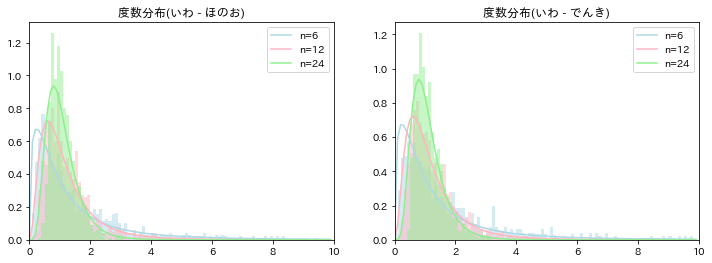

In [31]:
M = [4,8,16]
N = [6,12,24]

# 分散が既知
sig1 = np.std(d_iwa)
sig2 = np.std(d_hon)
sig3 = np.std(d_den)

fig, ax = plt.subplots(1,2,figsize=(12,4))
for i, (m, n) in enumerate(zip(M, N)):
    # 標準偏差
    sx = np.array([d_iwa.sample(n).std(ddof=1) for _  in range(1000)])
    sy1 = np.array([d_hon.sample(m).std(ddof=1)  for _  in range(1000)])
    sy2 = np.array([d_den.sample(m).std(ddof=1)  for _  in range(1000)])

    # 統計量
    f1 = (sig2**2/sig1**2)*(sx**2/sy1**2)
    f2 = (sig3**2/sig1**2)*(sx**2/sy2**2)
    
    # 分布
    x = np.arange(0,10,0.1)
    f_dist = stats.f.pdf(x, dfn=m-1, dfd=n-1)
    
    # プロット
    ax[0].plot(x, f_dist, color=colors[i], label='n='+str(n))
    ax[0].hist(f1, density=True, color=colors[i], alpha=.5, bins=np.arange(0,10,0.1));
    ax[0].set_xlim(0,10)
    
    ax[1].plot(x, f_dist, color=colors[i], label='n='+str(n))
    ax[1].hist(f2, density=True, color=colors[i], alpha=.5, bins=np.arange(0,10,0.1));
    ax[1].set_xlim(0,10)

ax[0].set_title('度数分布(いわ - ほのお)');
ax[1].set_title('度数分布(いわ - でんき)');    
ax[0].legend();
ax[1].legend();

### 標本相関係数の標本分布
同一の要素から2個異なった属性の観測値$X,Y$が得られたとする。
ここで、$X$を第一の属性値、$Y$を第二の属性値とする。
$X$と$Y$の母集団分布として母平均$\mu_X,\mu_Y$、母分散$\sigma_X^1,\sigma_Y^2$、母共分散$\sigma_{XY}$(母相関係数$\rho_{XY}$)の2次元正規分布$N((\mu_X,\mu_Y),(\sigma_X^1,\sigma_Y^2,\sigma_{XY}))$を考え、その2次元正規母集団から2次元の無作為標本

$$
(X_1,Y_1),(X_2,Y_2),\cdots,(X_n,Y_n)
$$

を得るものとする。

母共分散$\sigma_{XY}$と母相関係数$\rho_{XY}$は、

$$
\sigma_{XY}=E(X-\mu_X)(Y-\mu_Y)\\
\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}
$$

で定義され、標本共分散$s_{XY}$はそれに対応して

$$
s_{XY}=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})
$$

で、標本相関係数$r_{XY}$は、$s_{XY}$と標本標準偏差$s_X,s_Y$を用いて、

$$
r_{XY}=\frac{s_{XY}}{s_Xs_Y}
$$

で定義される。

標本相関係数の標本分布を直接的に求めることは大変難しいが、フィッシャーのz変換と呼ばれる近似法がある。
$r_{XY},\rho_{XY}$を単に$r,\rho$と書くと、この近似法は、標本相関係数$r$を、

$$
z=\frac{1}{2}\log \frac{1+r}{1-r}
$$

と変換し、母相関係数$\rho$も同じく

$$
\nu=\frac{1}{2}\log \frac{1+\rho}{1-\rho}
$$

と変換すると、$z$の標本分布が、$n$が大きいときに$N(\nu,1/(n-3))$となるというものである。
したがって、

$$
\sqrt{n-3}(z-\nu)
$$

が、$n$が大きいときに標準正規分布$N(0,1)$に従う、という形で用いることができる。

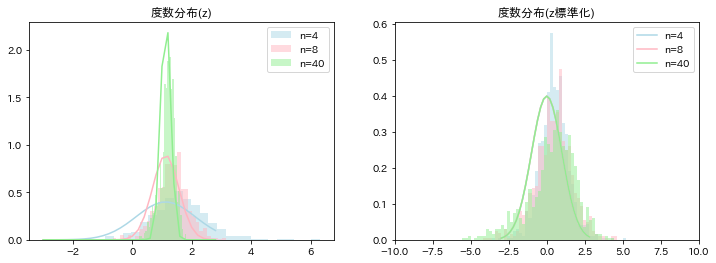

In [42]:
# 母集団の分散、共分散
sig2x, sigxy, _, sig2y = np.cov(d['log重さ'], d['log高さ']).ravel()
# 相関係数
rho = sigxy / np.sqrt(sig2x*sig2y)
nu = np.log((1+rho)/(1-rho))/2

fig, ax = plt.subplots(1,2,figsize=(12,4))
for i, n in enumerate([4, 8, 40]):
    cov = np.array([(lambda x: np.cov(x['log重さ'], x['log高さ'], ddof=1).ravel())(d.sample(n)) for _  in range(1000)])
    
    # 標本の分散、共分散
    s2x, sxy, s2y = cov[:,0], cov[:,1], cov[:,3]
    # 標本相関係数
    r = sxy / np.sqrt(s2x*s2y)
    z = np.log((1+r)/(1-r))/2
    
    # 分布
    x = np.arange(-3,3,0.2)
    n_dist1 = normal_dist(x, nu, 1/np.sqrt(n-3))
    n_dist2 = normal_dist(x, 0, 1)

    # プロット
    ax[0].hist(z, density=True, color=colors[i], alpha=.5, bins=30, label='n='+str(n));
    ax[0].plot(x, n_dist1, color=colors[i])
    ax[1].hist(np.sqrt(n-3)*(z-nu), density=True, color=colors[i], alpha=.5, bins=np.arange(-10,10,0.2));
    ax[1].plot(x, n_dist2, color=colors[i], label='n='+str(n))
    ax[1].set_xlim(-10,10)

ax[0].set_title('度数分布(z)');
ax[1].set_title('度数分布(z標準化)');    
ax[0].legend();
ax[1].legend();